In [6]:
import os
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import progressbar
import time
import datetime
import re

In [7]:
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


# Import

In [8]:
phishlist = pd.read_csv('d/goverCERTphishes.csv')

# Dates

In [9]:
phishlist.index = pd.to_datetime(phishlist['Date'], format='%b %d %Y %I:%M %p')

<AxesSubplot:xlabel='Date'>

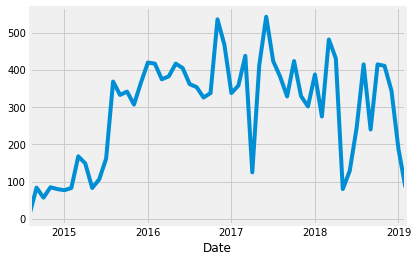

In [10]:
phishlist.resample('M')['ID'].count().plot()

Looking into beginning of the list

In [11]:
phishlist.resample('M')['ID'].count().head()

Date
2014-08-31    12
2014-09-30    84
2014-10-31    57
2014-11-30    85
2014-12-31    80
Freq: M, Name: ID, dtype: int64

And the end

In [12]:
phishlist.resample('M')['ID'].count().tail()

Date
2018-10-31    415
2018-11-30    411
2018-12-31    344
2019-01-31    188
2019-02-28     85
Freq: M, Name: ID, dtype: int64

Total

In [13]:
phishlist['URL'].count()

16198

Total Valid Phish

In [14]:
phishlist['Valid Phish'].value_counts()

Unknown        11743
VALID PHISH     4434
INVALID           21
Name: Valid Phish, dtype: int64

<AxesSubplot:ylabel='Valid Phish'>

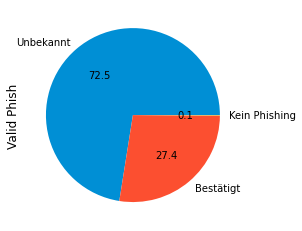

In [15]:
labels = ['Unbekannt', 'Bestätigt','Kein Phishing'] 
phishlist['Valid Phish'].value_counts().plot(kind='pie', figsize=(4,4), autopct='%.1f', labels=labels)

Wrongly files sites by GovCert

In [16]:
phishlist[phishlist['Valid Phish']=='INVALID']

,Date,ID,URL,Valid Phish
Date,,,,
2017-07-27 04:53:00,Jul 27 2017 4:53 AM,5120236,https://www.ricardo.ch/,INVALID
2016-05-24 04:44:00,May 24 2016 4:44 AM,4106887,http://marvelousjesus.com/templates/protostar/...,INVALID
2017-01-25 06:45:00,Jan 25 2017 6:45 AM,4767282,http://www.bfe.admin.ch/,INVALID
2018-01-08 11:04:00,Jan 8 2018 11:04 AM,5417008,http://veaulecoup.com/terms-condition/,INVALID
2018-09-26 16:58:00,Sep 26 2018 4:58 PM,5796240,http://teverganadeasfaltos.es/,INVALID
2018-09-26 16:58:00,Sep 26 2018 4:58 PM,5796239,http://domeneshop.no.teverganadeasfaltos.es/,INVALID
2018-10-22 14:36:00,Oct 22 2018 2:36 PM,5822617,https://banking.credem.it/newvir/login/login,INVALID
2016-06-13 07:13:00,Jun 13 2016 7:13 AM,4175699,http://ni992020_2.vweb05.nitrado.net,INVALID
2017-11-16 07:50:00,Nov 16 2017 7:50 AM,5336172,https://sellercentral.amazon.de/ap/signin?open...,INVALID


# Banking
Looking into affected banks

In [17]:
#Looking into URLs
phishlist['URL'].value_counts().head()

http://appleid.apple.net.cgi-key.confirm.eu.web.cmd.myapple.webscmd.ap...    8
http://fixfloordirect.co.uk/js/jscolor/global/en/about_ubs/careers/sea...    6
http://www.customicrosystemsinc.com/site/libraries/pattemplate/patTemp...    4
http://chiricopropiedades.com.ar/images/DatePager/id/fr-fr/security/ma...    4
https://vigilantevapers.com/skin/adminhtml/default/default/xmlconnect/...    4
Name: URL, dtype: int64

In [18]:
#Looking for ubs
def small(elem):
    elem = elem.lower()
    return elem

In [19]:
phishlist['URL'] = phishlist['URL'].apply(small)

<AxesSubplot:xlabel='Date'>

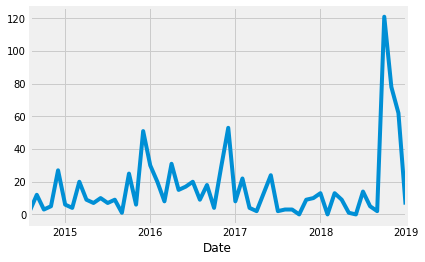

In [20]:
phishlist['ubs'] = phishlist['URL'].str.contains('ubs')
ubs = phishlist[phishlist['ubs']==True]
ubs.resample('M')['ID'].count().plot()

In [21]:
pd.DataFrame(ubs.resample('M')['ID'].count())

,ID
Date,
2014-08-31,2
2014-09-30,12
2014-10-31,3
2014-11-30,5
2014-12-31,27
2015-01-31,6
2015-02-28,4
2015-03-31,20
2015-04-30,9


In [22]:
ubs.head()

,Date,ID,URL,Valid Phish,ubs
Date,,,,,
2016-08-02 04:49:00,Aug 2 2016 4:49 AM,4336659,http://ebanking.mastercard.ch1.ubs.com.servers...,VALID PHISH,True
2016-08-01 07:55:00,Aug 1 2016 7:55 AM,4330793,http://exatactical.com/errors/ubs1.htm,Unknown,True
2016-08-01 07:54:00,Aug 1 2016 7:54 AM,4330792,http://thatcheappainter.net/errors/ubs.php,Unknown,True
2016-07-31 18:12:00,Jul 31 2016 6:12 PM,4330253,http://ebanking.mastercard.ch1.ubs.com.workben...,Unknown,True
2015-10-05 06:18:00,Oct 5 2015 6:18 AM,3510055,http://diverifydi.affiliatesdiscussion.com/ubs...,Unknown,True


In [23]:
ubs['URL'].count()

882

In [24]:
ubs

,Date,ID,URL,Valid Phish,ubs
Date,,,,,
2016-08-02 04:49:00,Aug 2 2016 4:49 AM,4336659,http://ebanking.mastercard.ch1.ubs.com.servers...,VALID PHISH,True
2016-08-01 07:55:00,Aug 1 2016 7:55 AM,4330793,http://exatactical.com/errors/ubs1.htm,Unknown,True
2016-08-01 07:54:00,Aug 1 2016 7:54 AM,4330792,http://thatcheappainter.net/errors/ubs.php,Unknown,True
2016-07-31 18:12:00,Jul 31 2016 6:12 PM,4330253,http://ebanking.mastercard.ch1.ubs.com.workben...,Unknown,True
2015-10-05 06:18:00,Oct 5 2015 6:18 AM,3510055,http://diverifydi.affiliatesdiscussion.com/ubs...,Unknown,True
...,...,...,...,...,...
2016-01-30 07:59:00,Jan 30 2016 7:59 AM,3798124,http://ebanking-ch2.ubs.com.secure-banking4680...,Unknown,True
2016-01-29 10:11:00,Jan 29 2016 10:11 AM,3795996,http://www.ubscardservices-update.biz/ubs/eban...,Unknown,True
2016-01-29 10:11:00,Jan 29 2016 10:11 AM,3795995,http://www.ubscardservices-update.biz/ubs/,Unknown,True


In [25]:
phishlist['URL'].count()

16198

Percentage of Phishes

In [26]:
print("Anteil der UBS phishing-Sites ist hoch:", round(ubs['URL'].count() / phishlist['URL'].count() * 100 , 1), "%")

Anteil der UBS phishing-Sites ist hoch: 5.4 %


In [27]:
ubs[ubs['Valid Phish']=='VALID PHISH']['URL'].count()

298

In [28]:
ubs[ubs['Valid Phish']=='VALID PHISH'].head()

,Date,ID,URL,Valid Phish,ubs
Date,,,,,
2016-08-02 04:49:00,Aug 2 2016 4:49 AM,4336659,http://ebanking.mastercard.ch1.ubs.com.servers...,VALID PHISH,True
2016-11-04 07:03:00,Nov 4 2016 7:03 AM,4578453,http://www.genebar.ch/img/ubs/2016/activation/...,VALID PHISH,True
2016-11-19 08:54:00,Nov 19 2016 8:54 AM,4623367,http://www.whatsapp-subscribes-messanger.org/p...,VALID PHISH,True
2018-11-21 16:35:00,Nov 21 2018 4:35 PM,5850507,http://login59gj.impresaproductions.com/ubs/us...,VALID PHISH,True
2018-11-21 16:35:00,Nov 21 2018 4:35 PM,5850506,http://login4.quinnlew.com/ubs/usb/,VALID PHISH,True


In [29]:
ubs[ubs['Valid Phish']=='Unknown'].head()

,Date,ID,URL,Valid Phish,ubs
Date,,,,,
2016-08-01 07:55:00,Aug 1 2016 7:55 AM,4330793,http://exatactical.com/errors/ubs1.htm,Unknown,True
2016-08-01 07:54:00,Aug 1 2016 7:54 AM,4330792,http://thatcheappainter.net/errors/ubs.php,Unknown,True
2016-07-31 18:12:00,Jul 31 2016 6:12 PM,4330253,http://ebanking.mastercard.ch1.ubs.com.workben...,Unknown,True
2015-10-05 06:18:00,Oct 5 2015 6:18 AM,3510055,http://diverifydi.affiliatesdiscussion.com/ubs...,Unknown,True
2015-10-04 14:56:00,Oct 4 2015 2:56 PM,3509244,http://572reup572re.hayabusas.org/ubs/card.php...,Unknown,True


In [30]:
ubs.to_csv('ubs.csv')

# Telecom

<AxesSubplot:xlabel='Date'>

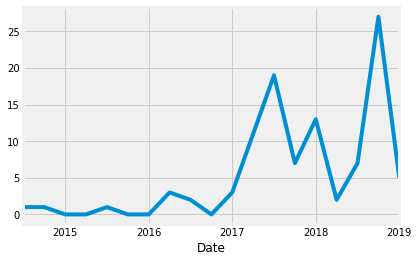

In [31]:
phishlist['sunrise'] = phishlist['URL'].str.contains('sunrise')
sunrise = phishlist[phishlist['sunrise']==True]
sunrise.resample('Q')['ID'].count().plot()

In [32]:
pd.DataFrame(sunrise.resample('Q')['ID'].count())

,ID
Date,
2014-09-30,1
2014-12-31,1
2015-03-31,0
2015-06-30,0
2015-09-30,1
2015-12-31,0
2016-03-31,0
2016-06-30,3
2016-09-30,2


In [33]:
sunrise['sunrise'].count()

102

In [34]:
sunrise

,Date,ID,URL,Valid Phish,ubs,sunrise
Date,,,,,,
2017-09-18 12:22:00,Sep 18 2017 12:22 PM,5222649,http://sunrise.anmelden.online/,Unknown,False,True
2018-11-20 11:33:00,Nov 20 2018 11:33 AM,5848994,https://sunriseinfos0.weebly.com/,Unknown,False,True
2018-04-17 04:41:00,Apr 17 2018 4:41 AM,5593919,https://mipsunrisech.godaddysites.com/,VALID PHISH,False,True
2017-09-18 05:13:00,Sep 18 2017 5:13 AM,5222381,http://mipsunrisech0.weebly.com/,Unknown,False,True
2017-09-08 07:00:00,Sep 8 2017 7:00 AM,5209550,http://mipsunrisech.weebly.com/,Unknown,False,True
...,...,...,...,...,...,...
2017-08-25 04:58:00,Aug 25 2017 4:58 AM,5181165,https://sunriseministry.com/store/ext/responsi...,Unknown,False,True
2017-08-25 04:58:00,Aug 25 2017 4:58 AM,5181164,https://sunriseministry.com/store/ext/responsi...,VALID PHISH,False,True
2017-08-24 10:13:00,Aug 24 2017 10:13 AM,5179065,https://sunriseministry.com/plugins/interventi...,VALID PHISH,False,True


In [35]:
sunrise.to_csv('sunrise.csv')

<AxesSubplot:xlabel='Date'>

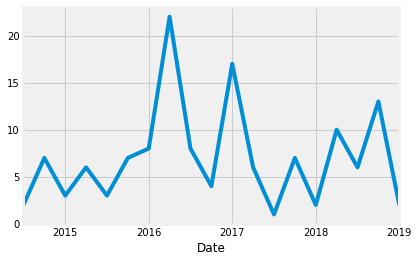

In [36]:
phishlist['swisscom'] = phishlist['URL'].str.contains('swisscom')
swisscom = phishlist[phishlist['swisscom']==True]
swisscom.resample('Q')['ID'].count().plot()

In [37]:
swisscom['swisscom'].count()

134

# Finding Top Level Domains

In [38]:
def toplevel(elem):
    elem = elem.replace('https://', '').replace('http://', '')
    elem = elem.split("/")[0].replace('www.','').strip()
    return elem

In [39]:
def countrydomain(elem):
    elem = elem.replace('https://', '').replace('http://', '')
    elem = elem.split("/")[0].replace('www.','').strip()
    elem = elem.split(".")[-1]
    elem = "."+elem
    return elem

In [40]:
phishlist['countryleveldomain'] = phishlist['URL'].apply(countrydomain)

In [41]:
phishlist['countryleveldomain'].value_counts().head(5)

.com    7503
.net     803
.org     497
.br      405
.ch      384
Name: countryleveldomain, dtype: int64

In [42]:
def realtoplevel(elem):
    if (elem.split('.')[-2] == 'co' or 
        elem.split('.')[-2] == 'com' or
        elem.split('.')[-2] == 'pe' or
        elem.split('.')[-2] == 'org' or
        elem.split('.')[-2] == 'edu' or
        elem.split('.')[-2] == 'ac' or
        elem.split('.')[-2] == 'gov'):
            minilst = elem.split('.')[-4:-1]
            elem = ''
            for e in minilst:
                e = e + "."
                elem += e 
            elem = elem[:-1]
    else:
        elem = elem.split('.')[-2]
    return elem

In [43]:
phishlist['temp'] = phishlist['URL'].apply(toplevel).apply(realtoplevel)

In [44]:
phishlist['finaltopleveldoms'] = phishlist['temp'] + phishlist['countryleveldomain']

In [45]:
phishlist['finaltopleveldoms'].value_counts().head()

.                    257
weebly.com           242
beget.tech           239
000webhostapp.com     91
hosttech.eu           86
Name: finaltopleveldoms, dtype: int64

In [46]:
# How many are Swiss
phishlist[phishlist['countryleveldomain']=='.ch']['temp'].value_counts().head()

myhostpoint            26
square7                13
rechercheretacheter     4
bestellen2015           4
theandco                4
Name: temp, dtype: int64

In [47]:
phishlist[phishlist['countryleveldomain']=='.ch']

,Date,ID,URL,Valid Phish,ubs,sunrise,swisscom,countryleveldomain,temp,finaltopleveldoms
Date,,,,,,,,,,
2016-08-24 05:01:00,Aug 24 2016 5:01 AM,4403424,http://agb-autoricardo.ch,VALID PHISH,False,False,False,.ch,agb-autoricardo,agb-autoricardo.ch
2017-09-07 09:13:00,Sep 7 2017 9:13 AM,5207006,http://www.visaeurope.ch.to-forst.ch/.x/vg/,Unknown,False,False,False,.ch,to-forst,to-forst.ch
2016-09-21 09:05:00,Sep 21 2016 9:05 AM,4474347,http://swakhohs.myhostpoint.ch/secure/17d62941...,Unknown,False,False,False,.ch,myhostpoint,myhostpoint.ch
2016-09-21 09:05:00,Sep 21 2016 9:05 AM,4474346,http://swakhohs.myhostpoint.ch/secure/,Unknown,False,False,False,.ch,myhostpoint,myhostpoint.ch
2016-09-21 09:04:00,Sep 21 2016 9:04 AM,4474344,http://swakhohs.myhostpoint.ch/secure/a42b6cd7...,Unknown,False,False,False,.ch,myhostpoint,myhostpoint.ch
...,...,...,...,...,...,...,...,...,...,...
2016-12-08 08:23:00,Dec 8 2016 8:23 AM,4668085,http://66k8g5n9.myhostpoint.ch/informiamo/app/...,Unknown,False,False,False,.ch,myhostpoint,myhostpoint.ch
2016-12-08 08:23:00,Dec 8 2016 8:23 AM,4668084,http://66k8g5n9.myhostpoint.ch/informiamo/app/...,Unknown,False,False,False,.ch,myhostpoint,myhostpoint.ch
2016-08-07 19:31:00,Aug 7 2016 7:31 PM,4354089,http://secure3d.apple.com.order-cancel.ch,Unknown,False,False,False,.ch,order-cancel,order-cancel.ch


In [48]:
pd.set_option(".max_colwidth",-1)

/Users/barneyjs/.virtualenvs/podesta/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [49]:
phishlist[phishlist['countryleveldomain']=='.ch']

,Date,ID,URL,Valid Phish,ubs,sunrise,swisscom,countryleveldomain,temp,finaltopleveldoms
Date,,,,,,,,,,
2016-08-24 05:01:00,Aug 24 2016 5:01 AM,4403424,http://agb-autoricardo.ch,VALID PHISH,False,False,False,.ch,agb-autoricardo,agb-autoricardo.ch
2017-09-07 09:13:00,Sep 7 2017 9:13 AM,5207006,http://www.visaeurope.ch.to-forst.ch/.x/vg/,Unknown,False,False,False,.ch,to-forst,to-forst.ch
2016-09-21 09:05:00,Sep 21 2016 9:05 AM,4474347,http://swakhohs.myhostpoint.ch/secure/17d6294132b5e3a46110e481ff038904...,Unknown,False,False,False,.ch,myhostpoint,myhostpoint.ch
2016-09-21 09:05:00,Sep 21 2016 9:05 AM,4474346,http://swakhohs.myhostpoint.ch/secure/,Unknown,False,False,False,.ch,myhostpoint,myhostpoint.ch
2016-09-21 09:04:00,Sep 21 2016 9:04 AM,4474344,http://swakhohs.myhostpoint.ch/secure/a42b6cd7a9ab8060c0ce87a755df3829...,Unknown,False,False,False,.ch,myhostpoint,myhostpoint.ch
...,...,...,...,...,...,...,...,...,...,...
2016-12-08 08:23:00,Dec 8 2016 8:23 AM,4668085,http://66k8g5n9.myhostpoint.ch/informiamo/app/8b6a3d032e794aa109d59412...,Unknown,False,False,False,.ch,myhostpoint,myhostpoint.ch
2016-12-08 08:23:00,Dec 8 2016 8:23 AM,4668084,http://66k8g5n9.myhostpoint.ch/informiamo/app/...,Unknown,False,False,False,.ch,myhostpoint,myhostpoint.ch
2016-08-07 19:31:00,Aug 7 2016 7:31 PM,4354089,http://secure3d.apple.com.order-cancel.ch,Unknown,False,False,False,.ch,order-cancel,order-cancel.ch


In [ ]:
phishlist[phishlist['Valid Phish']=='INVALID']

In [ ]:
phishlist.resample('D')['URL'].count().mean()